In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [51]:
cd ~/Documents/Github/GSTEM/data/sampledata

/Users/catherinezhou/Documents/GitHub/GSTEM/data/sampledata


In [52]:
#change the data path here
data = pd.read_csv("train.csv", index_col = 0)

In [13]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
# Other analysis
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python 

data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


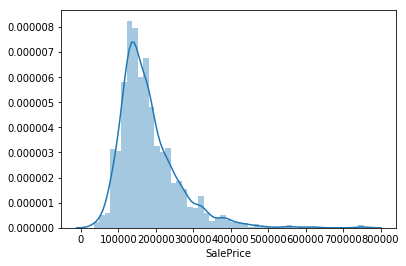

In [64]:
sns.distplot(data['SalePrice']);

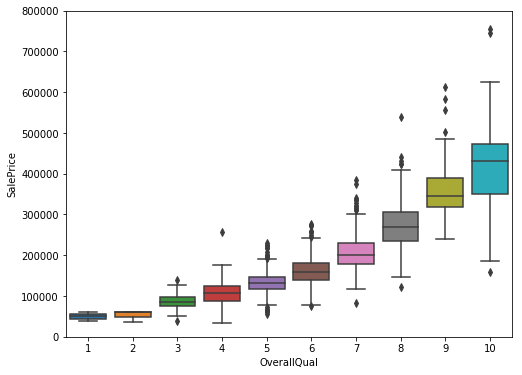

In [65]:
# Relationship w/ categorical features

var = 'OverallQual'
datal = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

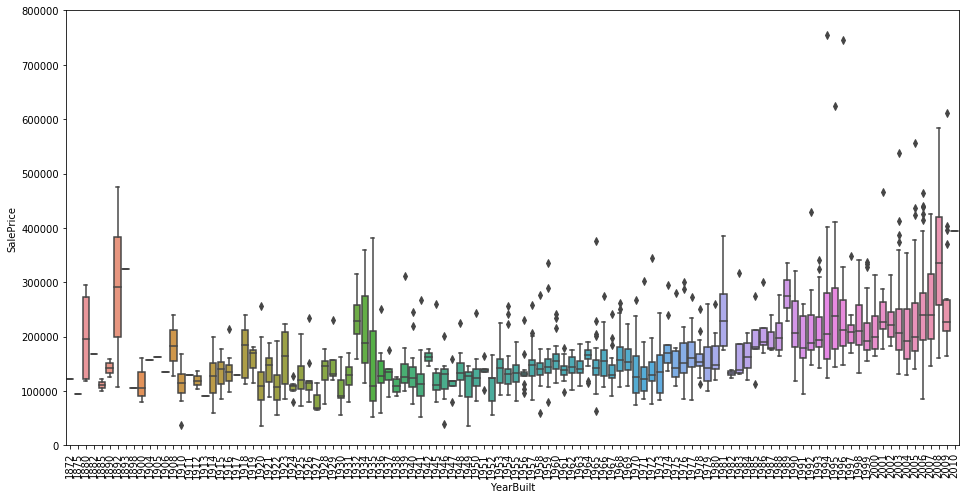

In [66]:
var = 'YearBuilt'
datal = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

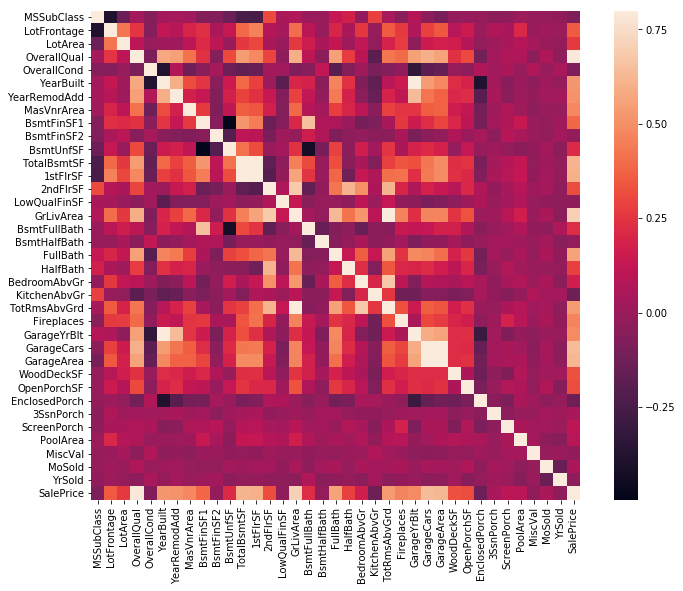

In [67]:
# Correlation matrix

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# You can tell that the correlation between the variables 
# TotalBsmtSF and 1stFlrSf are strong 

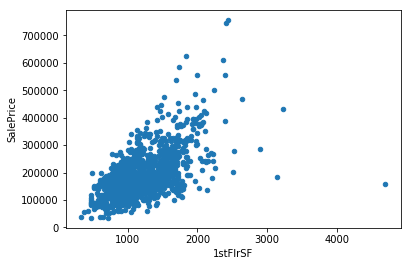

In [5]:
%matplotlib inline
data.plot(x = "1stFlrSF", y = "SalePrice", kind = 'scatter')

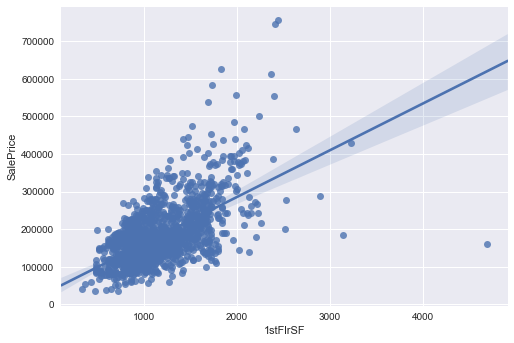

In [9]:
sns.regplot(data["1stFlrSF"], data["SalePrice"])

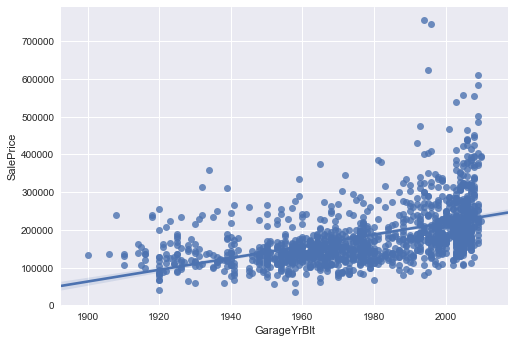

In [10]:
sns.regplot(data["GarageYrBlt"], data["SalePrice"])
# Not a good predictor 

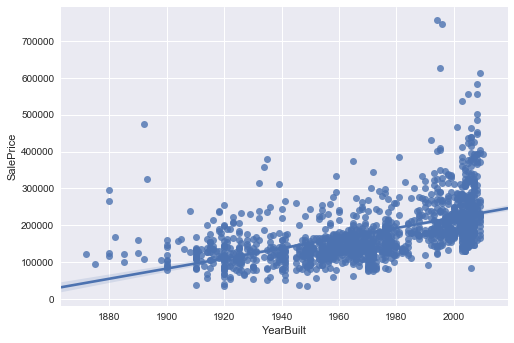

In [11]:
sns.regplot(data["YearBuilt"], data["SalePrice"])

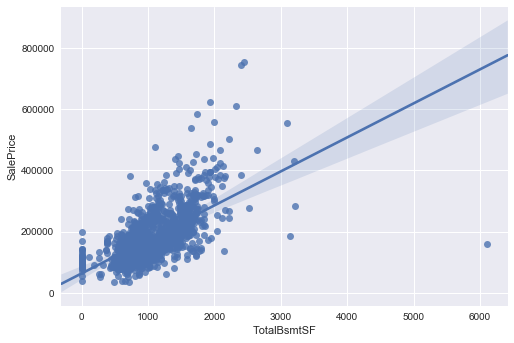

In [12]:
sns.regplot(data["TotalBsmtSF"], data["SalePrice"])

In [ ]:
# Set x and y axes 
x = data[["YearBuilt"]]
y = data[['SalePrice']]

# Split the data 
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)
# 0.33 = 33% saved for testing set 
# 0.67 = 67% saved for training + validation 

# Fitting model for training set
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_) 

# Why is RMSE calculated before the validation set is plotted? 
#It works when it's calculated after too. 

print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

# Apply same model to validation set and set trend line  
ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Year Built")
ax.set_ylabel("Selling Price")

In [ ]:
x = data[["OverallQual"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))


ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Overall material and finish quality")
ax.set_ylabel("Selling Price")


In [ ]:
x = data[["GrLivArea"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Above grade (ground) living area square feet")
ax.set_ylabel("Selling Price")

In [ ]:
x = data[["GarageArea"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Garage Area")
ax.set_ylabel("Selling Price")

In [ ]:
x = data[["Fireplaces"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Number of fireplaces")
ax.set_ylabel("Selling Price")

# Surprisingly more relevant to sale price than overall condition rating (next cell)

In [ ]:
x = data[["OverallCond"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Overall condition rating")
ax.set_ylabel("Selling Price")

In [ ]:
data.hist("SalePrice", bins = 50)

In [ ]:
numericlist = data.select_dtypes(include='number')
numericlist.columns

In [14]:
import seaborn as sns

def reg_plots(df, target):
    columns = data.select_dtypes(include=['number']).drop(target, axis= 1).columns
    col_num = len(columns)//3
    fig, axarr = plt.subplots( col_num,3, figsize=(18, 50))
    axarr = axarr.flatten()
    for i in range(len(columns)):
        sns.regplot(df[columns[i]], df[target], ax=axarr[i])

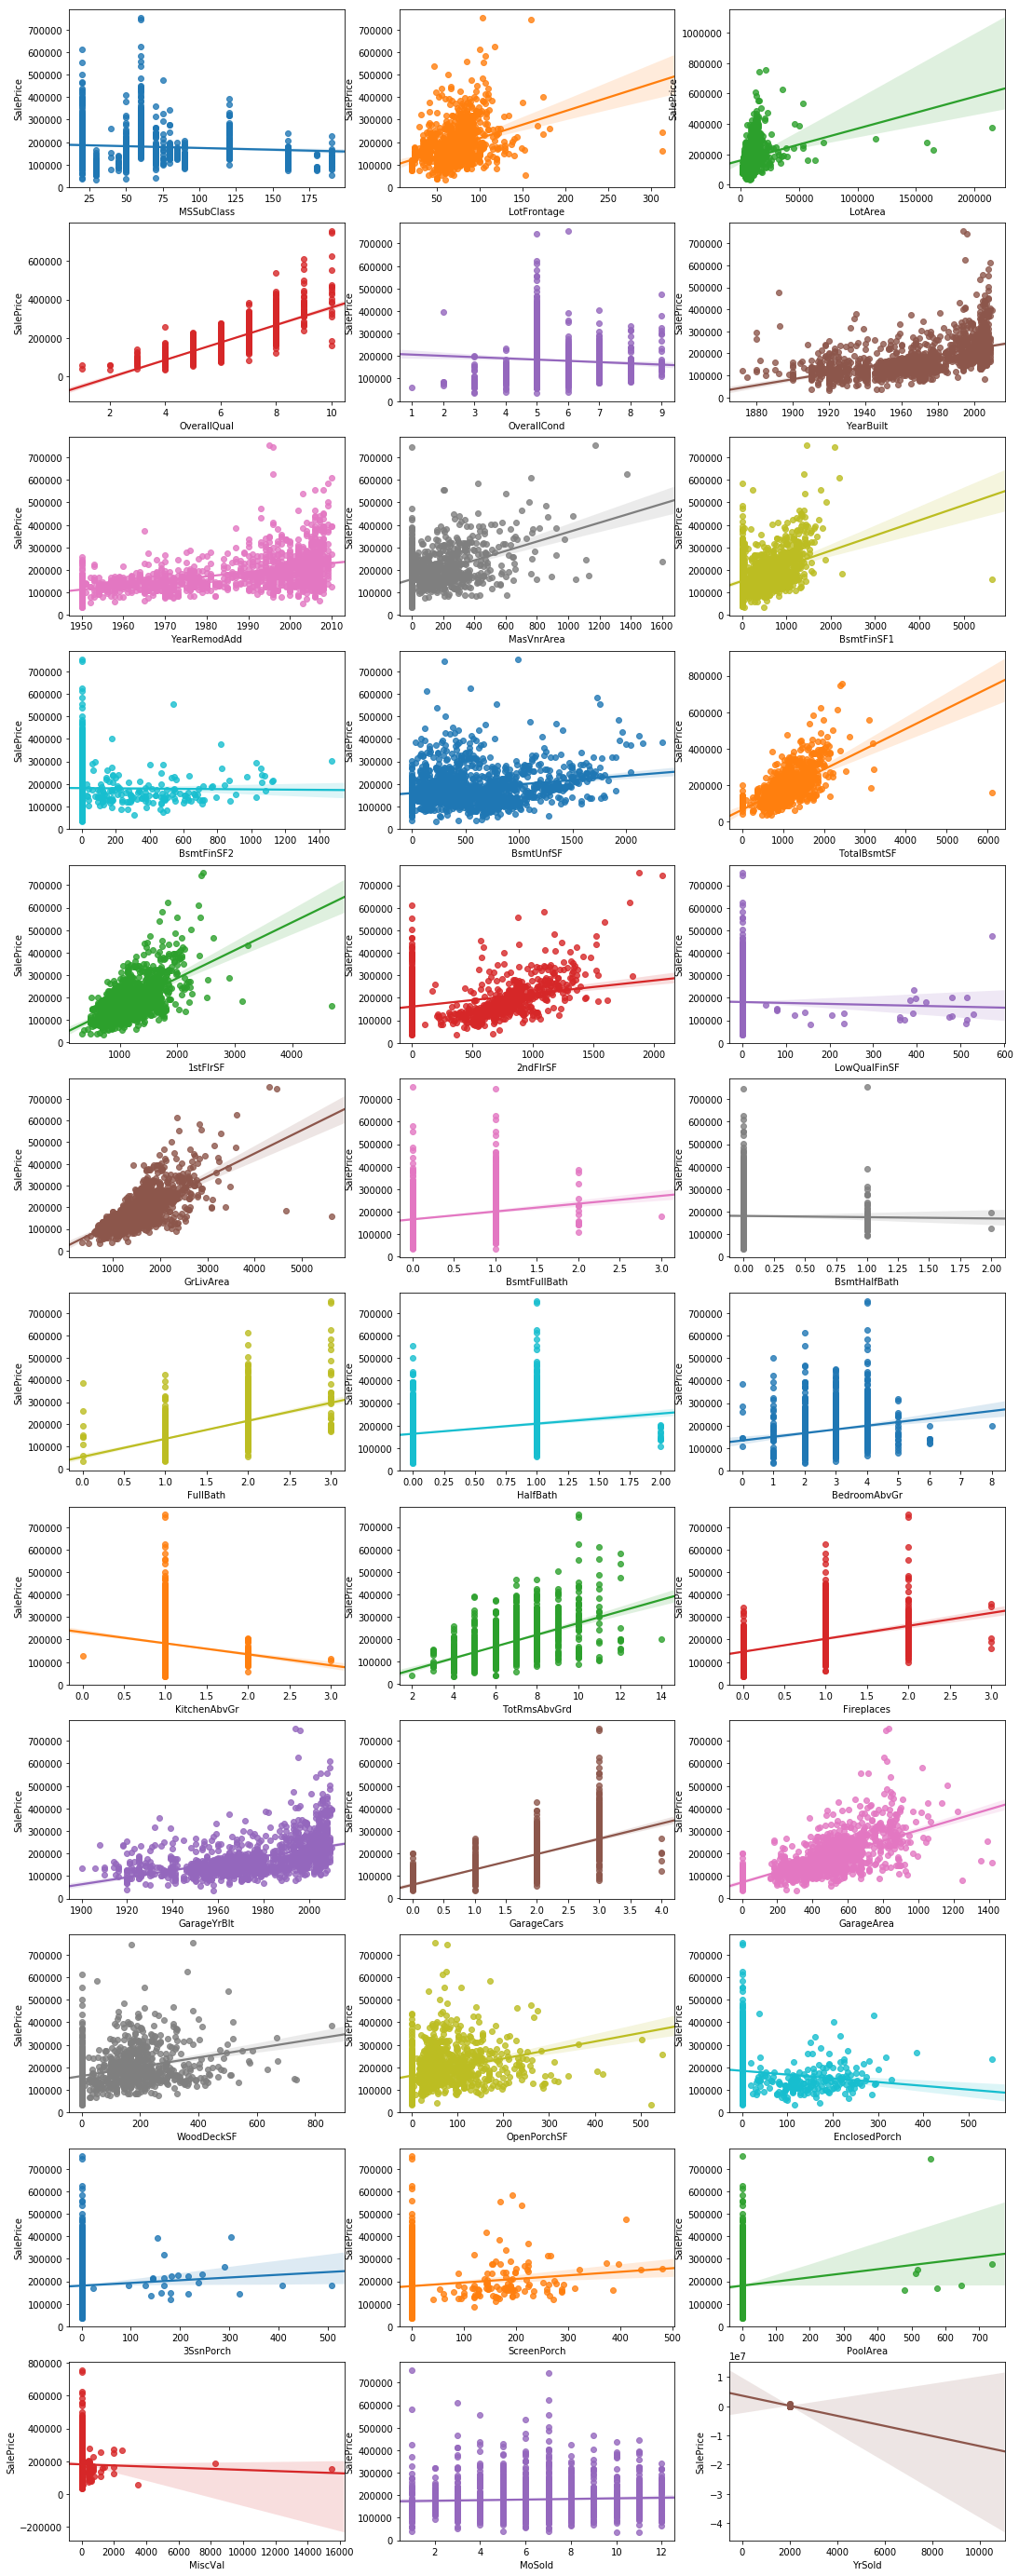

In [15]:
reg_plots(data, 'SalePrice')

In [40]:
from sklearn.metrics import mean_squared_error as mse

def calc_regression(df, target):
    columns = df.select_dtypes(include=['int64']).drop(target, axis= 1).columns
    for j, i in enumerate(columns):
        # Set x and y axes 
        X = df[[i]]
        Y = df[[target]]
        # Split the data 
        x_train, x_validation, y_train, y_validation = train_test_split(X,Y,\
                                                                        test_size = 0.33, random_state = 42)
        # Fitting model for training set
        regr = linear_model.LinearRegression()
        regr.fit(x_train, y_train)
        # predicting the target
        train_prediction = regr.predict(x_validation)
        
        #calculating the error (check if it matches with the other caculation you guys were using )
        RMSE = round(mse(y_validation, train_prediction)**0.5, 2)
        if RMSE < 70000:
            print(i, RMSE, round(regr.coef_[0][0]))

In [71]:
calc_regression(data, 'SalePrice')

# I expected the coefficients for GrLivArea and 1stFlrSF to be higher, and 
# the GarageCars coefficient to be lower 

OverallQual 51746.72 43696.0
TotalBsmtSF 65679.67 100.0
1stFlrSF 66128.35 114.0
GrLivArea 56577.61 99.0
FullBath 69301.45 75603.0
GarageCars 66406.48 67063.0
GarageArea 67299.54 227.0


In [18]:
# Combination of both functions


def linear_regression(df, target):
    columns = df.select_dtypes(include=['int64']).drop(target, axis= 1).columns
    col_num = len(columns)//3
    fig, axarr = plt.subplots( col_num,3, figsize=(18, 50))
    axarr = axarr.flatten()
    for j, i in enumerate(columns):
        # Set x and y axes 
        X = df[[i]]
        Y = df[[target]]
        # Split the data 
        x_train, x_validation, y_train, y_validation = train_test_split(X,Y,\
                                                                        test_size = 0.33, random_state = 42)
        # Fitting model for training set
        regr = linear_model.LinearRegression()
        regr.fit(x_train, y_train)
        train_prediction = regr.predict(x_validation)
        RMSE = round(mse(y_validation, train_prediction)**0.5, 2)
        axarr[j].scatter(x_validation, y_validation, color = 'black')
        axarr[j].plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
        axarr[j].set_xlabel(i)
        axarr[j].set_ylabel(target)
        axarr[j].text(0.2,0.8,"RMSE: "+ str(RMSE)+'\nCoefficients: '+str(round(regr.coef_[0][0])),\
                     transform=axarr[j].transAxes)

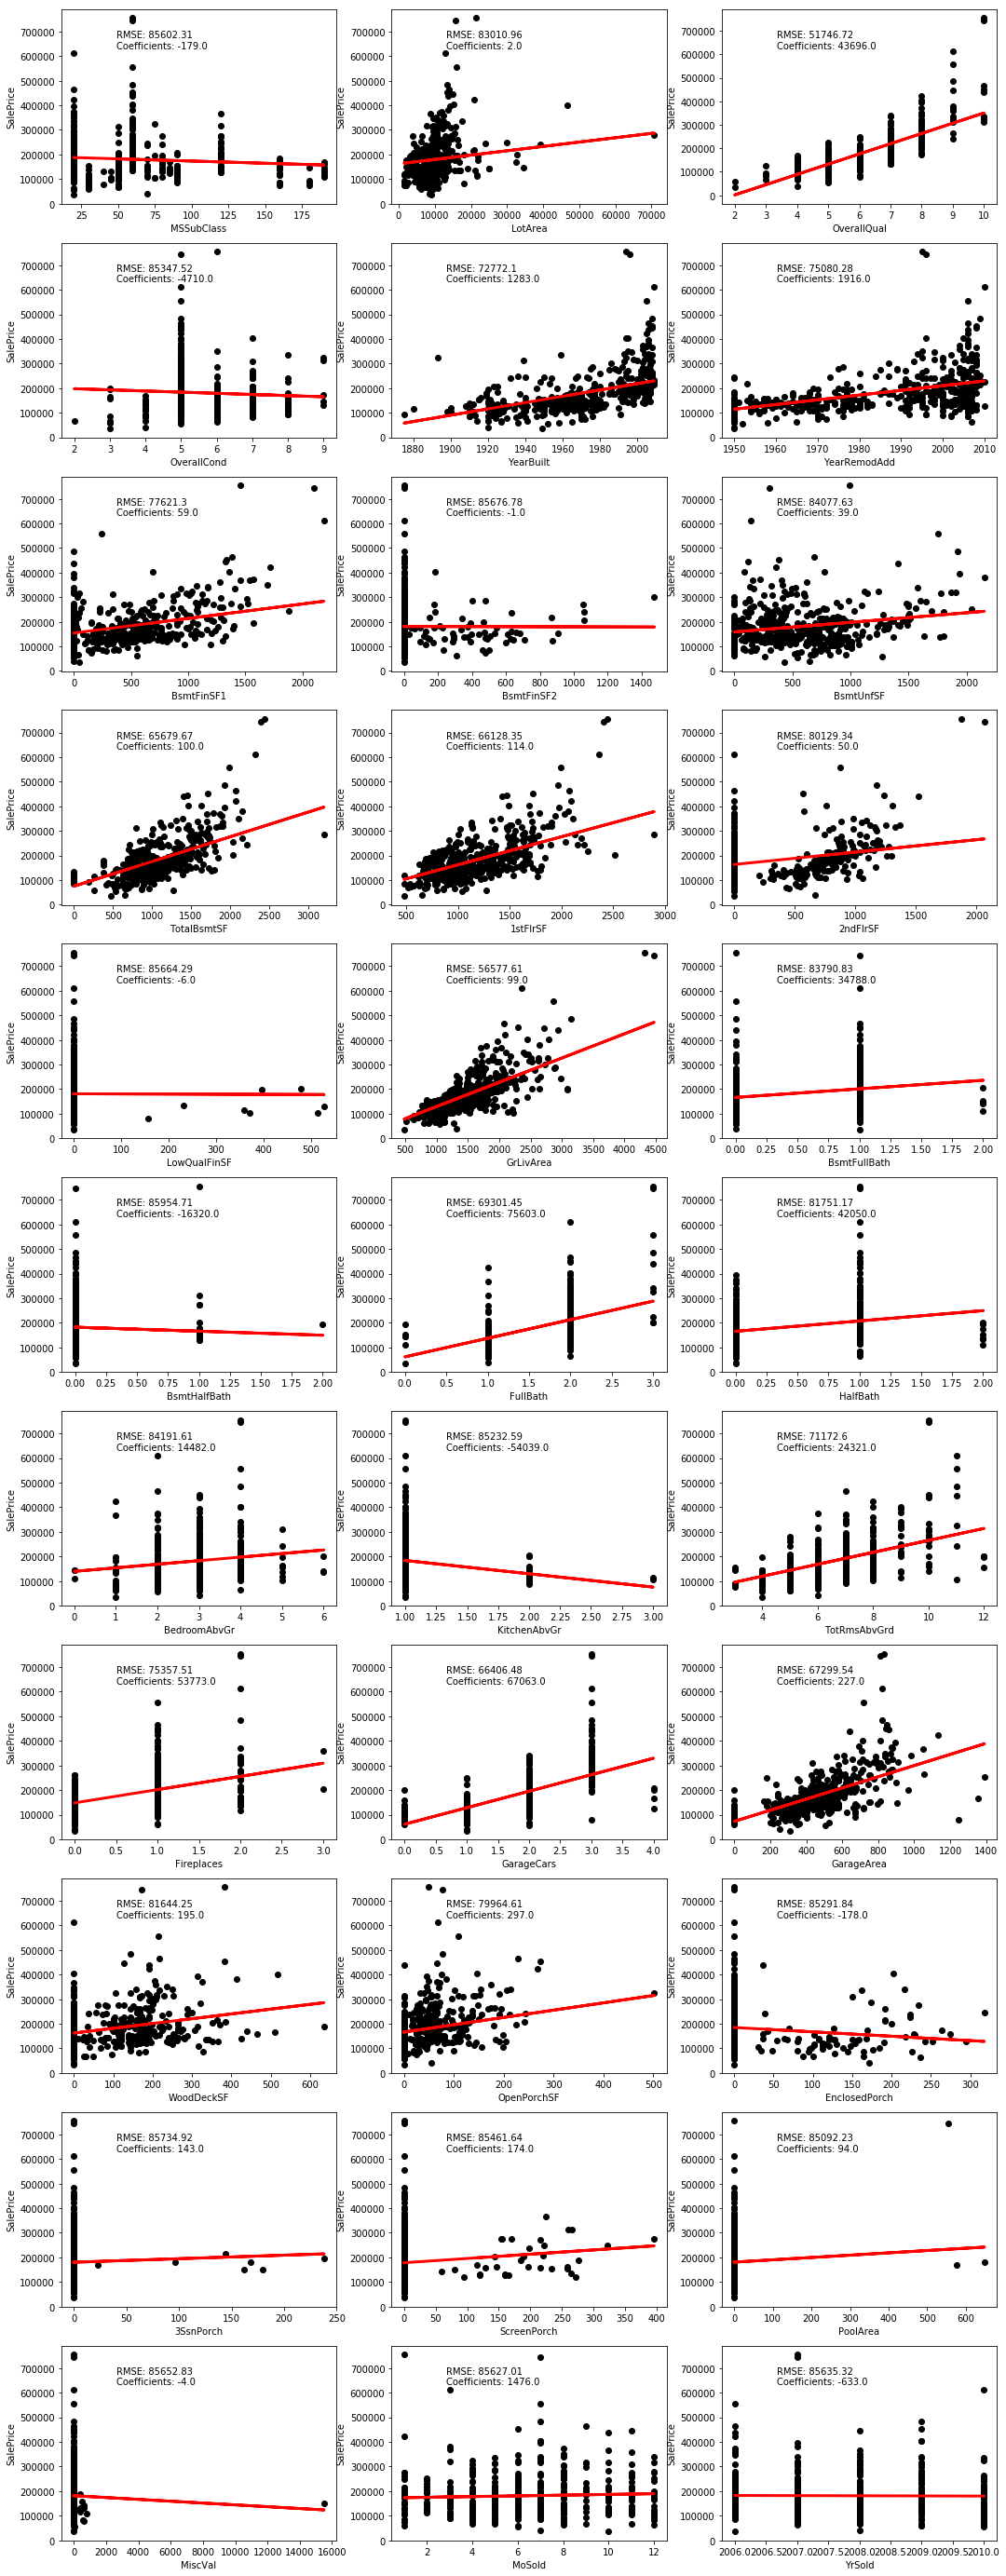

In [19]:
linear_regression(data, 'SalePrice')

In [59]:
# Write an if/else loop to filter columns with low RMSE and them use linear regression to model using all
# those variables. See if it improves the RMSE value. 


def linear_regression(df, target):
    columns = df.select_dtypes(include=['int64']).drop(target, axis= 1).columns
    col_num = len(columns)//3
    fig, axarr = plt.subplots( col_num,3, figsize=(18, 50))
    axarr = axarr.flatten()
    for j, i in enumerate(columns):
        # Set x and y axes 
        X = df[[i]]
        Y = df[[target]]
        # Split the data 
        x_train, x_validation, y_train, y_validation = train_test_split(X,Y,\
                                                                        test_size = 0.33, random_state = 42)
        # Fitting model for training set
        regr = linear_model.LinearRegression()
        regr.fit(x_train, y_train)
        train_prediction = regr.predict(x_validation)
        RMSE = round(mse(y_validation, train_prediction)**0.5, 2)
        if RMSE < 70000:
            axarr[j].scatter(x_validation, y_validation, color = 'black')
            axarr[j].plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
            axarr[j].set_xlabel(i)
            axarr[j].set_ylabel(target)
            axarr[j].text(0.2,0.8,"RMSE: "+ str(RMSE)+'\nCoefficients: '+str(round(regr.coef_[0][0])),\
                     transform=axarr[j].transAxes)
        else:
            pass


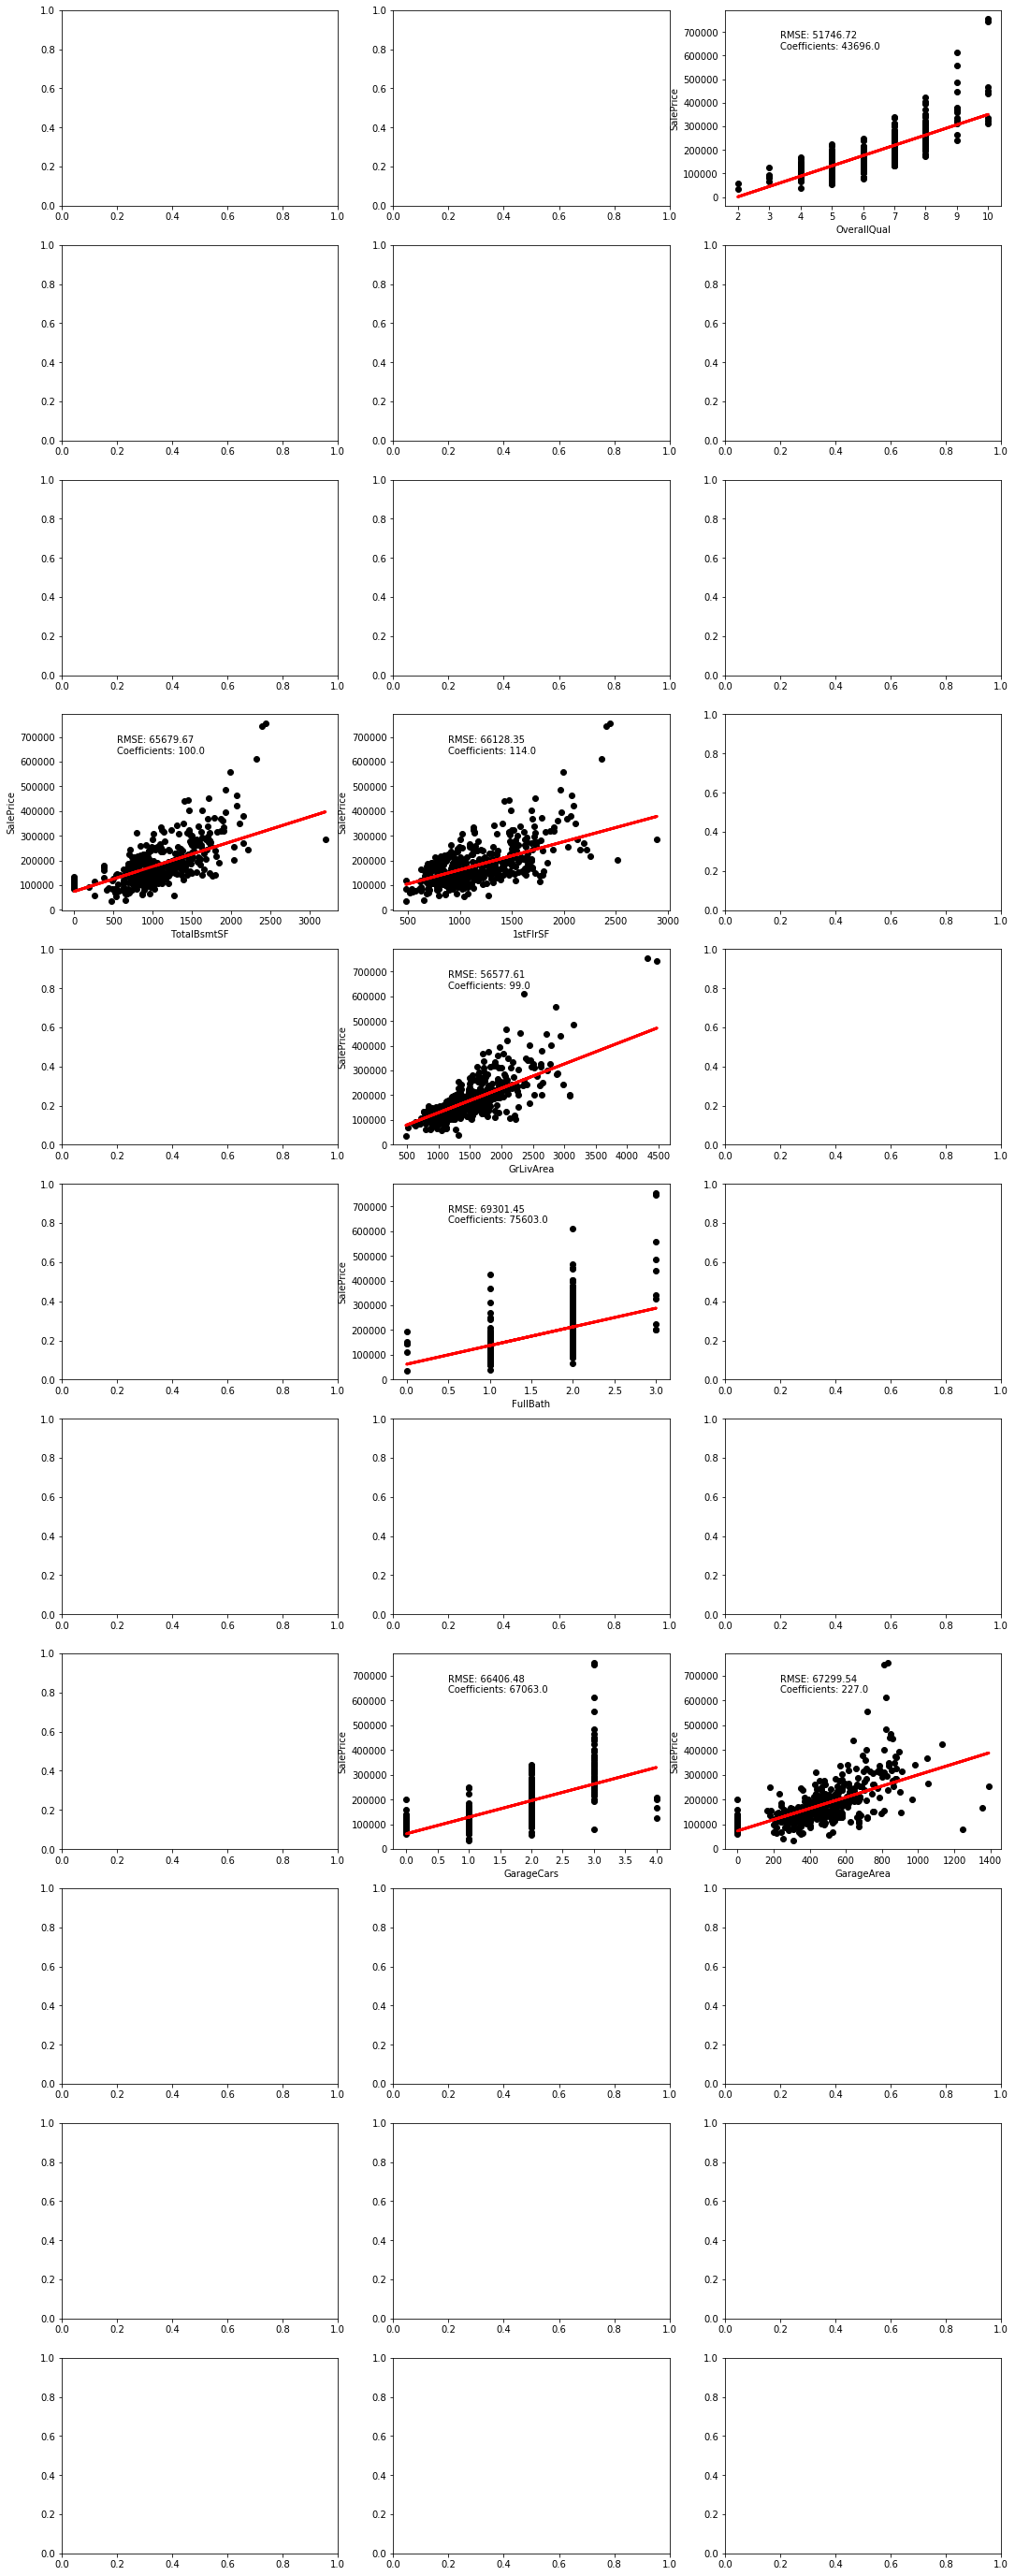

In [60]:
linear_regression(data, 'SalePrice')